# Logistic Regression on Titanic Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv(r'C:\Users\HP\Documents\Datasets\titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data.isna().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [14]:
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
data['Age'].mean()

29.69911764705882

In [18]:
data['Age'].median()

28.0

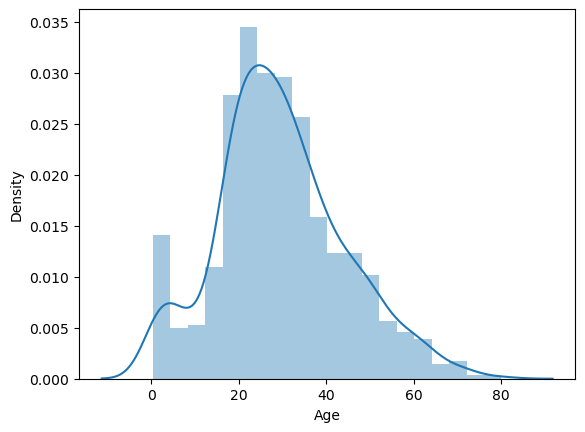

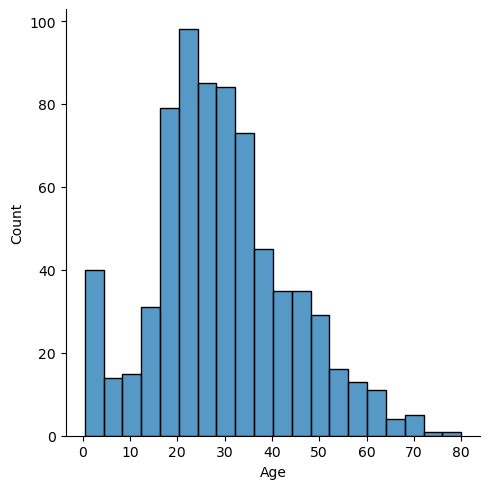

In [20]:
sns.distplot(data['Age'])
sns.displot(data['Age'])

In [22]:
data['Age'].skew()

0.38910778230082704

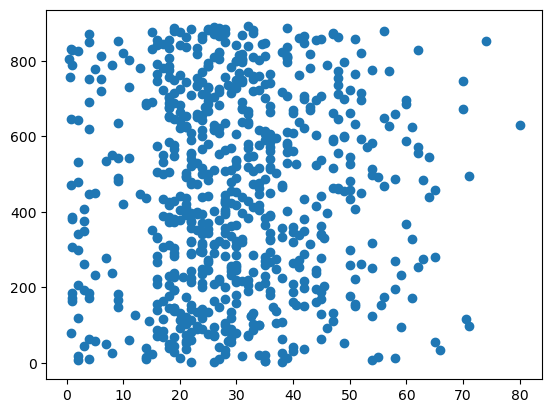

In [24]:
plt.scatter(data.Age, data.PassengerId)

In [26]:
data['Age'].fillna(data['Age'].mean(), inplace= True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [32]:
data['Age'].skew()

0.4344880940129925

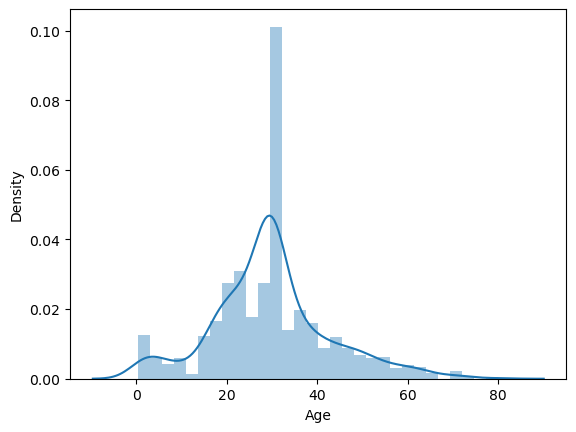

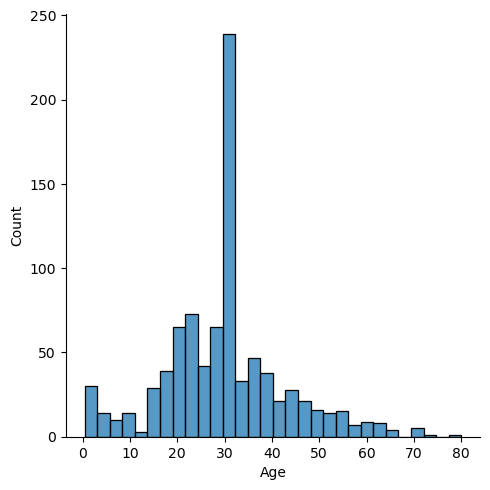

In [34]:
sns.distplot(data['Age'])
sns.displot(data['Age'])

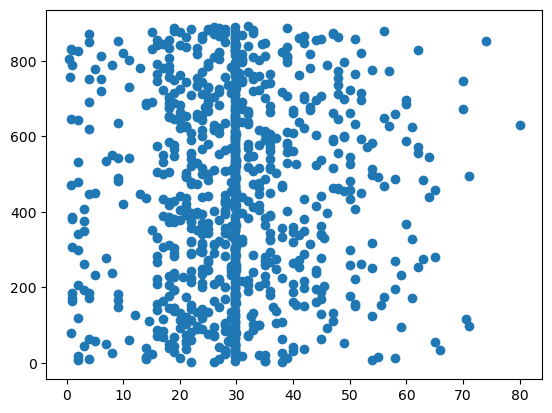

In [36]:
plt.scatter(data.Age, data.PassengerId)

In [38]:
def column_info(column):
    print(f'Description of {column} : \n{data[column].describe()}')
    print(f'Value Counts of {column} : \n{data[column].value_counts()}')
    print(f'Unique Values of {column} : \n{data[column].unique()}')
    print(f'Missing Values of {column} : \n{data[column].isna().sum()}')
for col in data.select_dtypes(include= [float, int, object]).columns:
    print(f'\033[1m.........................................................{col}.........................................................\033[0m')
    column_info(col)

.........................................................PassengerId.........................................................
Description of PassengerId : 
count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64
Value Counts of PassengerId : 
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
Unique Values of PassengerId : 
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108

In [40]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [42]:
data['Gender']= data['Sex'].map({'male' : 0, 'female' : 1})
data['Embarked']= data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,1.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,0.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,0.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,0.0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,0.0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,1.0,0


In [44]:
data.drop(columns= ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin'], axis=1, inplace= True)

In [46]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.000000,1,0,7.2500,0.0,0
1,1,1,38.000000,1,0,71.2833,1.0,1
2,1,3,26.000000,0,0,7.9250,0.0,1
3,1,1,35.000000,1,0,53.1000,0.0,1
4,0,3,35.000000,0,0,8.0500,0.0,0
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0.0,0
887,1,1,19.000000,0,0,30.0000,0.0,1
888,0,3,29.699118,1,2,23.4500,0.0,1
889,1,1,26.000000,0,0,30.0000,1.0,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
 7   Gender    891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [50]:
data.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Gender      0
dtype: int64

In [52]:
data.dropna(inplace= True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    float64
 7   Gender    889 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 62.5 KB


In [56]:
data.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Gender      0
dtype: int64

In [58]:
data.shape

(889, 8)

<Axes: >

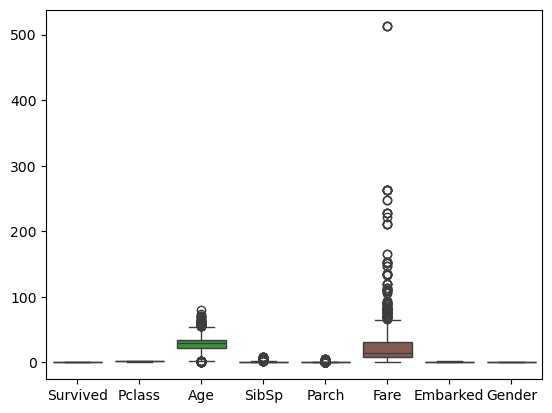

In [60]:
sns.boxplot(data)

<Axes: ylabel='Fare'>

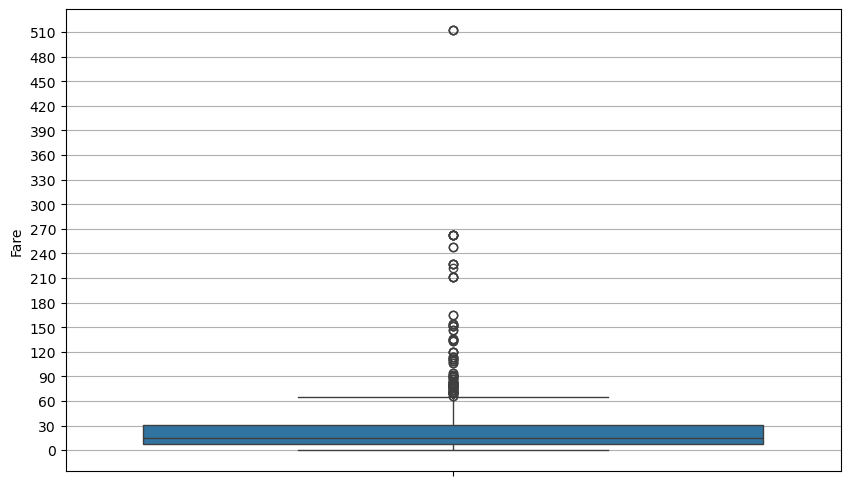

In [62]:
plt.figure(figsize= (10,6))
plt.grid()
plt.yticks(np.arange(0, 600, 30))
sns.boxplot(data['Fare'])

In [64]:
data[data['Fare'] > 60]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
1,1,1,38.000000,1,0,71.2833,1.0,1
27,0,1,19.000000,3,2,263.0000,0.0,0
31,1,1,29.699118,1,0,146.5208,1.0,1
34,0,1,28.000000,1,0,82.1708,1.0,0
52,1,1,49.000000,1,0,76.7292,1.0,1
...,...,...,...,...,...,...,...,...
846,0,3,29.699118,8,2,69.5500,0.0,0
849,1,1,29.699118,1,0,89.1042,1.0,1
856,1,1,45.000000,1,1,164.8667,0.0,1
863,0,3,29.699118,8,2,69.5500,0.0,1


In [66]:
len(data[data['Fare'] > 180])

20

In [68]:
len(data[data['Fare'] > 100])

53

In [70]:
data[data['Fare'] > 100].index

Index([ 27,  31,  88, 118, 195, 215, 258, 268, 269, 297, 299, 305, 306, 307,
       311, 318, 319, 325, 332, 334, 337, 341, 373, 377, 380, 390, 393, 435,
       438, 498, 505, 527, 537, 544, 550, 557, 581, 609, 659, 660, 679, 689,
       698, 700, 708, 716, 730, 737, 742, 763, 779, 802, 856],
      dtype='int64')

In [72]:
data.shape

(889, 8)

In [74]:
data.drop(index= [27,  31,  88, 118, 195, 215, 258, 268, 269, 297, 299, 305, 306, 307,
       311, 318, 319, 325, 332, 334, 337, 341, 373, 377, 380, 390, 393, 435,
       438, 498, 505, 527, 537, 544, 550, 557, 581, 609, 659, 660, 679, 689,
       698, 700, 708, 716, 730, 737, 742, 763, 779, 802, 856], axis=0, inplace= True)

In [76]:
data.shape

(836, 8)

<Axes: ylabel='Fare'>

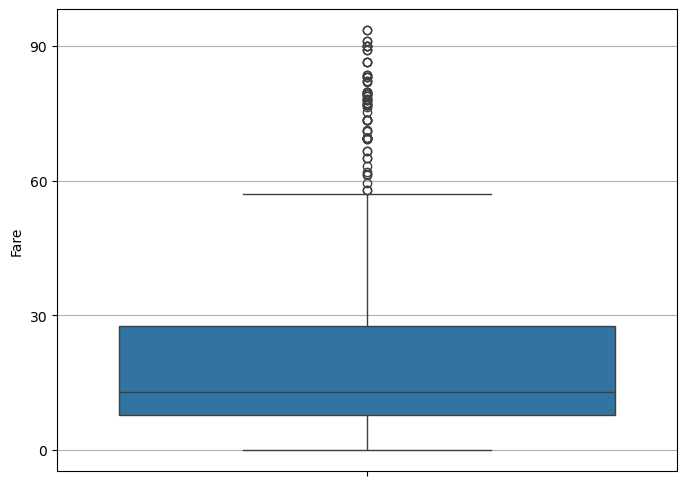

In [78]:
plt.figure(figsize= (8,6))
plt.grid()
plt.yticks(np.arange(0, 200, 30))
sns.boxplot(data['Fare'])

In [80]:
data[data.duplicated()]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
47,1,3,29.699118,0,0,7.7500,2.0,1
76,0,3,29.699118,0,0,7.8958,0.0,0
77,0,3,29.699118,0,0,8.0500,0.0,0
87,0,3,29.699118,0,0,8.0500,0.0,0
95,0,3,29.699118,0,0,8.0500,0.0,0
...,...,...,...,...,...,...,...,...
870,0,3,26.000000,0,0,7.8958,0.0,0
877,0,3,19.000000,0,0,7.8958,0.0,0
878,0,3,29.699118,0,0,7.8958,0.0,0
884,0,3,25.000000,0,0,7.0500,0.0,0


In [82]:
data.drop_duplicates(keep= 'first', inplace= True)

In [84]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.000000,1,0,7.2500,0.0,0
1,1,1,38.000000,1,0,71.2833,1.0,1
2,1,3,26.000000,0,0,7.9250,0.0,1
3,1,1,35.000000,1,0,53.1000,0.0,1
4,0,3,35.000000,0,0,8.0500,0.0,0
...,...,...,...,...,...,...,...,...
885,0,3,39.000000,0,5,29.1250,2.0,1
887,1,1,19.000000,0,0,30.0000,0.0,1
888,0,3,29.699118,1,2,23.4500,0.0,1
889,1,1,26.000000,0,0,30.0000,1.0,0


In [86]:
data[data.duplicated()]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender


In [88]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
Survived,1.000000,-0.299285,-0.096715,-0.046337,0.065252,0.260022,0.069610,0.490345
Pclass,-0.299285,1.000000,-0.360892,0.111110,0.112106,-0.670134,0.056529,-0.061266
Age,-0.096715,-0.360892,1.000000,-0.282470,-0.202189,0.142881,0.002090,-0.111731
SibSp,-0.046337,0.111110,-0.282470,1.000000,0.379184,0.287337,-0.038356,0.099951
Parch,0.065252,0.112106,-0.202189,0.379184,1.000000,0.183667,-0.065759,0.259121
Fare,0.260022,-0.670134,0.142881,0.287337,0.183667,1.000000,0.015548,0.167943
Embarked,0.069610,0.056529,0.002090,-0.038356,-0.065759,0.015548,1.000000,0.091237
Gender,0.490345,-0.061266,-0.111731,0.099951,0.259121,0.167943,0.091237,1.000000


<Axes: >

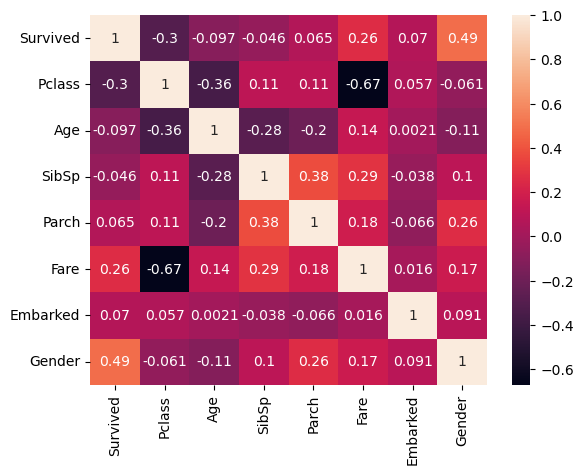

In [90]:
sns.heatmap(data.corr(), annot= True)

In [91]:
data.corr()['Survived']

Survived    1.000000
Pclass     -0.299285
Age        -0.096715
SibSp      -0.046337
Parch       0.065252
Fare        0.260022
Embarked    0.069610
Gender      0.490345
Name: Survived, dtype: float64

In [94]:
data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Gender'],
      dtype='object')

In [96]:
x= data.iloc[:, 1:]  # x= data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Gender']]
y= data.iloc[:, 0]   # y= data['Survived']

In [98]:
x

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,3,22.000000,1,0,7.2500,0.0,0
1,1,38.000000,1,0,71.2833,1.0,1
2,3,26.000000,0,0,7.9250,0.0,1
3,1,35.000000,1,0,53.1000,0.0,1
4,3,35.000000,0,0,8.0500,0.0,0
...,...,...,...,...,...,...,...
885,3,39.000000,0,5,29.1250,2.0,1
887,1,19.000000,0,0,30.0000,0.0,1
888,3,29.699118,1,2,23.4500,0.0,1
889,1,26.000000,0,0,30.0000,1.0,0


In [100]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 725, dtype: int64

In [102]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state= 42)

In [104]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
538,3,29.699118,0,0,14.5000,0.0,0
6,1,54.000000,0,0,51.8625,0.0,0
508,3,28.000000,0,0,22.5250,0.0,0
727,3,29.699118,0,0,7.7375,2.0,1
492,1,55.000000,0,0,30.5000,0.0,0
...,...,...,...,...,...,...,...
75,3,25.000000,0,0,7.6500,0.0,0
116,3,70.500000,0,0,7.7500,2.0,0
301,3,29.699118,2,0,23.2500,2.0,0
523,1,44.000000,0,1,57.9792,1.0,1


In [106]:
x_test

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
383,1,35.000000,1,0,52.0000,0.0,1
628,3,26.000000,0,0,7.8958,0.0,0
676,3,24.500000,0,0,8.0500,0.0,0
35,1,42.000000,1,0,52.0000,0.0,0
446,2,13.000000,0,1,19.5000,0.0,1
...,...,...,...,...,...,...,...
541,3,9.000000,4,2,31.2750,0.0,1
388,3,29.699118,0,0,7.7292,2.0,0
448,3,5.000000,2,1,19.2583,1.0,1
516,2,34.000000,0,0,10.5000,0.0,1


In [108]:
y_train

538    0
6      0
508    0
727    1
492    0
      ..
75     0
116    0
301    1
523    1
112    0
Name: Survived, Length: 580, dtype: int64

In [110]:
y_test

383    1
628    0
676    0
35     0
446    1
      ..
541    0
388    0
448    1
516    1
149    0
Name: Survived, Length: 145, dtype: int64

In [112]:
lr= LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [114]:
y_train_pred= lr.predict(x_train)
y_test_pred= lr.predict(x_test)

In [116]:
y_train_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,

In [118]:
y_test_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [136]:
# Predicting survival of a person whose data point is not in dataset
new_data_1= [[3,43,1,1,20.450,0,0]]
new_data_2= [[3,43,1,1,20.450,0,1]]
new_data_3= [[1,31,2,1,50.450,1,1]]
new_data_4= [[1,33,2,0,60.450,1,0]]
new_data_5= [[2,27,0,1,35.550,2,0]]
new_data_6= [[2,28,1,1,30.550,2,1]]
new_data_7= [[2,25,0,0,43.550,0,0]]

In [138]:
lr.predict(new_data_1)

array([0], dtype=int64)

In [140]:
lr.predict(new_data_2)

array([0], dtype=int64)

In [142]:
lr.predict(new_data_3)

array([1], dtype=int64)

In [144]:
lr.predict(new_data_4)

array([0], dtype=int64)

In [146]:
lr.predict(new_data_5)

array([0], dtype=int64)

In [148]:
lr.predict(new_data_6)

array([1], dtype=int64)

In [150]:
lr.predict(new_data_7)

array([0], dtype=int64)

In [152]:
confusion_matrix(y_train, y_train_pred)

array([[298,  58],
       [ 73, 151]], dtype=int64)

In [154]:
accuracy_score(y_train, y_train_pred)

0.7741379310344828

In [156]:
accuracy_score(y_train, y_train_pred)*100

77.41379310344828

In [158]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       356
           1       0.72      0.67      0.70       224

    accuracy                           0.77       580
   macro avg       0.76      0.76      0.76       580
weighted avg       0.77      0.77      0.77       580



<Axes: >

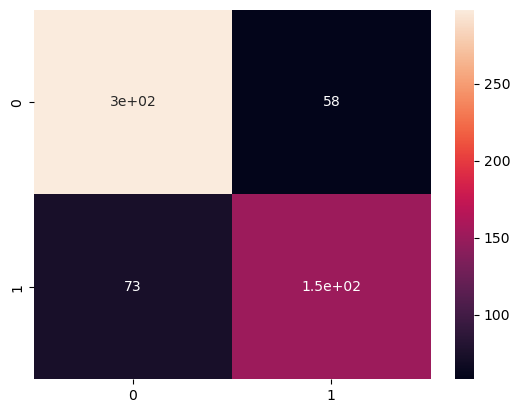

In [160]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot= True)
# For changing labels - xticklabels= ('False','True'), yticklabels= ('False','True'))

In [162]:
confusion_matrix(y_test, y_test_pred)

array([[68, 20],
       [15, 42]], dtype=int64)

<Axes: >

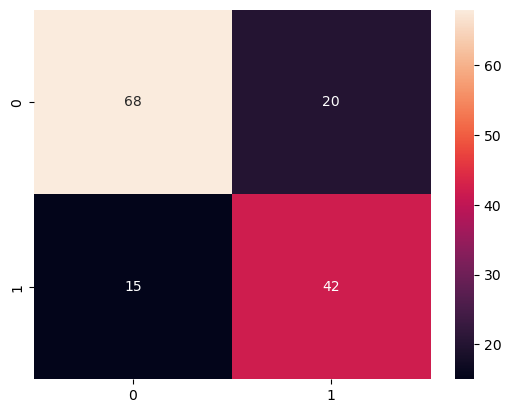

In [164]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot= True)

In [166]:
accuracy_score(y_test, y_test_pred)

0.7586206896551724

In [168]:
accuracy_score(y_test, y_test_pred)*100

75.86206896551724

In [170]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80        88
           1       0.68      0.74      0.71        57

    accuracy                           0.76       145
   macro avg       0.75      0.75      0.75       145
weighted avg       0.76      0.76      0.76       145



# SVM

In [173]:
from sklearn.svm import SVC

In [175]:
svc= SVC()
svc.fit(x_train, y_train)

SVC()

In [177]:
y_train_pred_svc= svc.predict(x_train)
y_test_pred_svc= svc.predict(x_test)

In [179]:
confusion_matrix(y_train, y_train_pred_svc)

array([[328,  28],
       [168,  56]], dtype=int64)

In [181]:
accuracy_score(y_train, y_train_pred_svc)

0.6620689655172414

In [183]:
confusion_matrix(y_test, y_test_pred_svc)

array([[78, 10],
       [45, 12]], dtype=int64)

In [185]:
accuracy_score(y_test, y_test_pred_svc)

0.6206896551724138

# KNN

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [192]:
y_train_pred_knn= knn.predict(x_train)
y_test_pred_knn= knn.predict(x_test)

In [194]:
confusion_matrix(y_train, y_train_pred_knn)

array([[306,  50],
       [ 80, 144]], dtype=int64)

In [196]:
accuracy_score(y_train, y_train_pred_knn)

0.7758620689655172

In [198]:
confusion_matrix(y_test, y_test_pred_knn)

array([[67, 21],
       [28, 29]], dtype=int64)

In [200]:
accuracy_score(y_test, y_test_pred_knn)

0.6620689655172414

# Hyperparameter Tuning

In [203]:
from sklearn.model_selection import GridSearchCV

In [205]:
parameters= {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1.0, 0.1, 0.01, 0.001],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}
parameters

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [1.0, 0.1, 0.01, 0.001],
 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
 'max_iter': [100, 200, 500, 1000]}

In [207]:
lr= LogisticRegression()
grid= GridSearchCV(estimator= lr, param_grid= parameters, cv= 5, verbose= 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END C=1.0, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.767 total time=   0.0s
[CV 2/5] END C=1.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 3/5] END C=1.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.767 total time=   0.0s
[CV 4/5] END C=1.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.793 total time=   0.0s
[CV 5/5] END C=1.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.716 total time=   0.0s
[CV 1/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01, 0.001],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             verbose=3)

In [208]:
grid.best_params_

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}

In [209]:
grid.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, solver='sag')

In [210]:
y_train_pred_grid= grid.predict(x_train)
y_test_pred_grid= grid.predict(x_test)

In [211]:
confusion_matrix(y_train, y_train_pred_grid)

array([[311,  45],
       [ 83, 141]], dtype=int64)

In [212]:
accuracy_score(y_train, y_train_pred_grid)

0.7793103448275862

In [213]:
confusion_matrix(y_test, y_test_pred_grid)

array([[72, 16],
       [16, 41]], dtype=int64)

In [214]:
accuracy_score(y_test, y_test_pred_grid)

0.7793103448275862

In [215]:
# Just testing
clf= LogisticRegression(C=1.0, max_iter=100, penalty='l2', solver='lbfgs')
clf.fit(x_train, y_train)

LogisticRegression()

In [216]:
train_pred= clf.predict(x_train)
test_pred= clf.predict(x_test)

In [217]:
accuracy_score(y_train, train_pred)

0.7741379310344828

In [218]:
accuracy_score(y_test, test_pred)

0.7586206896551724

# End of Project